In [ ]:
# Export ERP to text (universal)
# Create mne.EvokedArray() object 

### Plotting single-subject averaged ERPs

In [1]:
import os
import mne
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
def parse_bdf(BDF_txt):
    f1 = open(BDF_txt, encoding='utf-8')
    f2 = f1.read().split()
    f1.close()
    bin_labels = [f2[2+4*i] for i in range(int((len(f2))/4))]
    
    bins = {}
    for i,x in enumerate(bin_labels):
        bins[x] = i
    return bins

In [3]:
bins = parse_bdf('S1_bdf_18bins.txt')
bins

{'G': 0,
 'UG': 1,
 'G_Cor': 2,
 'UG_Cor': 3,
 'G_Incor': 4,
 'UG_Incor': 5,
 'LVF_G_Cor': 6,
 'RVF_G_Cor': 7,
 'LVF_UG_Cor': 8,
 'RVF_UG_Cor': 9,
 'LVF_G_NP_Cor': 10,
 'LVF_UG_NP_Cor': 11,
 'LVF_G_VP_Cor': 12,
 'LVF_UG_VP_Cor': 13,
 'RVF_G_NP_Cor': 14,
 'RVF_UG_NP_Cor': 15,
 'RVF_G_VP_Cor': 16,
 'RVF_UG_VP_Cor': 17}

In [41]:
prefix, path = 'S1_18bins_', 'avg_erp_bins'
files_orig = [[f for f in fs if f.startswith(prefix)] for root, dirs, fs in os.walk(path, topdown=True)][0]
files = [None]*len(files_orig)

for f in files_orig:
    try:
        files[bins[f[10:-5]]] = f  # 10 and -5 depend on the file names
    except KeyError:
        files[bins[f[10:-4]]] = f  # 10 and -4 depend on the file names

files

['S1_18bins_G .txt',
 'S1_18bins_UG.txt',
 'S1_18bins_G_Cor .txt',
 'S1_18bins_UG_Cor.txt',
 'S1_18bins_G_Incor .txt',
 'S1_18bins_UG_Incor.txt',
 'S1_18bins_LVF_G_Cor .txt',
 'S1_18bins_RVF_G_Cor .txt',
 'S1_18bins_LVF_UG_Cor.txt',
 'S1_18bins_RVF_UG_Cor.txt',
 'S1_18bins_LVF_G_NP_Cor.txt',
 'S1_18bins_LVF_UG_NP_Cor .txt',
 'S1_18bins_LVF_G_VP_Cor.txt',
 'S1_18bins_LVF_UG_VP_Cor .txt',
 'S1_18bins_RVF_G_NP_Cor.txt',
 'S1_18bins_RVF_UG_NP_Cor .txt',
 'S1_18bins_RVF_G_VP_Cor.txt',
 'S1_18bins_RVF_UG_VP_Cor .txt']

In [42]:
raw = mne.io.read_raw_eeglab('S1.set')
ch_names = raw.ch_names
ch_names = [i if 'Z' not in i else i[:-1]+'z' for i in ch_names]
ch_names[ch_names.index('FP1')], ch_names[ch_names.index('FP2')] = 'Fp1','Fp2'
to_exclude = ['M1','M2','HEO','VEO']
# M1, M2 are not EOG; just setting them to EOG so that they don't get shown in the topo 
ch_types = ['eeg' if i not in to_exclude else 'eog' for i in ch_names]
info = mne.create_info(ch_names, ch_types=ch_types, sfreq=1000)
# Using biosemi64 so that the electrodes won't exceed the scalp boundary
info.set_montage('biosemi64', on_missing='ignore');

Reading C:\Users\jowan\erpclass\S1.fdt


In [43]:
evokeds, data = [None]*len(files), np.empty((len(files)), dtype=np.ndarray)
tmin = -0.2

os.chdir(path)
for i, f in enumerate(files):
    df = pd.read_csv(f, sep='	').drop(columns=['time','Unnamed: 35'])
    eeglab_data = df.to_numpy().transpose()
    data[i] = eeglab_data
    evokeds[i] = mne.EvokedArray(data=eeglab_data, info=info, tmin=tmin)
os.chdir('..')

evokeds[0]

<Evoked | '' (average, N=1), -0.2 – 1.199 s, baseline off, 34 ch, ~415 kB>

In [15]:
display(df)

,FP1,FP2,F7,F3,FZ,F4,F8,FT7,FC3,FCZ,...,P7,P3,PZ,P4,P8,O1,OZ,O2,HEO,VEO
0,-1.184338,-1.886623,-1.013654,-2.061050,-1.930956,-1.687583,-1.722785,-0.963253,-1.391243,-1.300607,...,2.070223,0.969372,1.568584,1.921052,3.336793,5.095417,4.349384,4.469244,-0.234671,0.919846
1,-1.305181,-2.046069,-1.221558,-2.183672,-2.112429,-1.899350,-1.850026,-1.142704,-1.551130,-1.465886,...,1.783366,0.713928,1.249456,1.572224,2.978911,4.600533,3.867405,4.033340,-0.272175,1.044479
2,-1.417717,-2.194923,-1.412381,-2.291910,-2.279500,-2.099197,-1.955142,-1.319974,-1.698054,-1.619122,...,1.501046,0.461729,0.937740,1.229971,2.630649,4.103630,3.379663,3.600305,-0.299529,1.155949
3,-1.515355,-2.325460,-1.573324,-2.378244,-2.421906,-2.276869,-2.032905,-1.485341,-1.824013,-1.751795,...,1.235230,0.222173,0.645471,0.907401,2.305611,3.623867,2.902501,3.185118,-0.315573,1.245462
4,-1.592995,-2.433147,-1.695775,-2.438834,-2.532635,-2.426550,-2.091334,-1.625435,-1.925662,-1.858873,...,0.996296,0.002139,0.380446,0.614306,2.012298,3.182765,2.454410,2.799154,-0.326533,1.307118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,7.760736,8.181756,4.910132,5.890729,7.350548,8.109842,5.703215,5.015555,5.634419,7.665205,...,1.323943,3.117184,9.490823,6.156674,1.593284,2.920502,3.794281,2.861653,1.459992,-6.846333
1396,7.809699,8.230431,4.921462,5.919737,7.425815,8.207450,5.767086,5.050406,5.656412,7.720173,...,1.405719,3.186283,9.550970,6.250145,1.746173,3.081059,3.971932,3.034749,1.468949,-6.926342
1397,7.882249,8.292676,4.966275,5.972858,7.515062,8.318567,5.835626,5.110752,5.703499,7.788636,...,1.498201,3.263854,9.614819,6.341461,1.896233,3.250653,4.154808,3.207024,1.471322,-7.004683
1398,7.970366,8.363927,5.038469,6.043294,7.610789,8.436393,5.904266,5.191595,5.768920,7.865442,...,1.596061,3.344026,9.680172,6.428550,2.038255,3.418944,4.330990,3.369512,1.469019,-7.077238


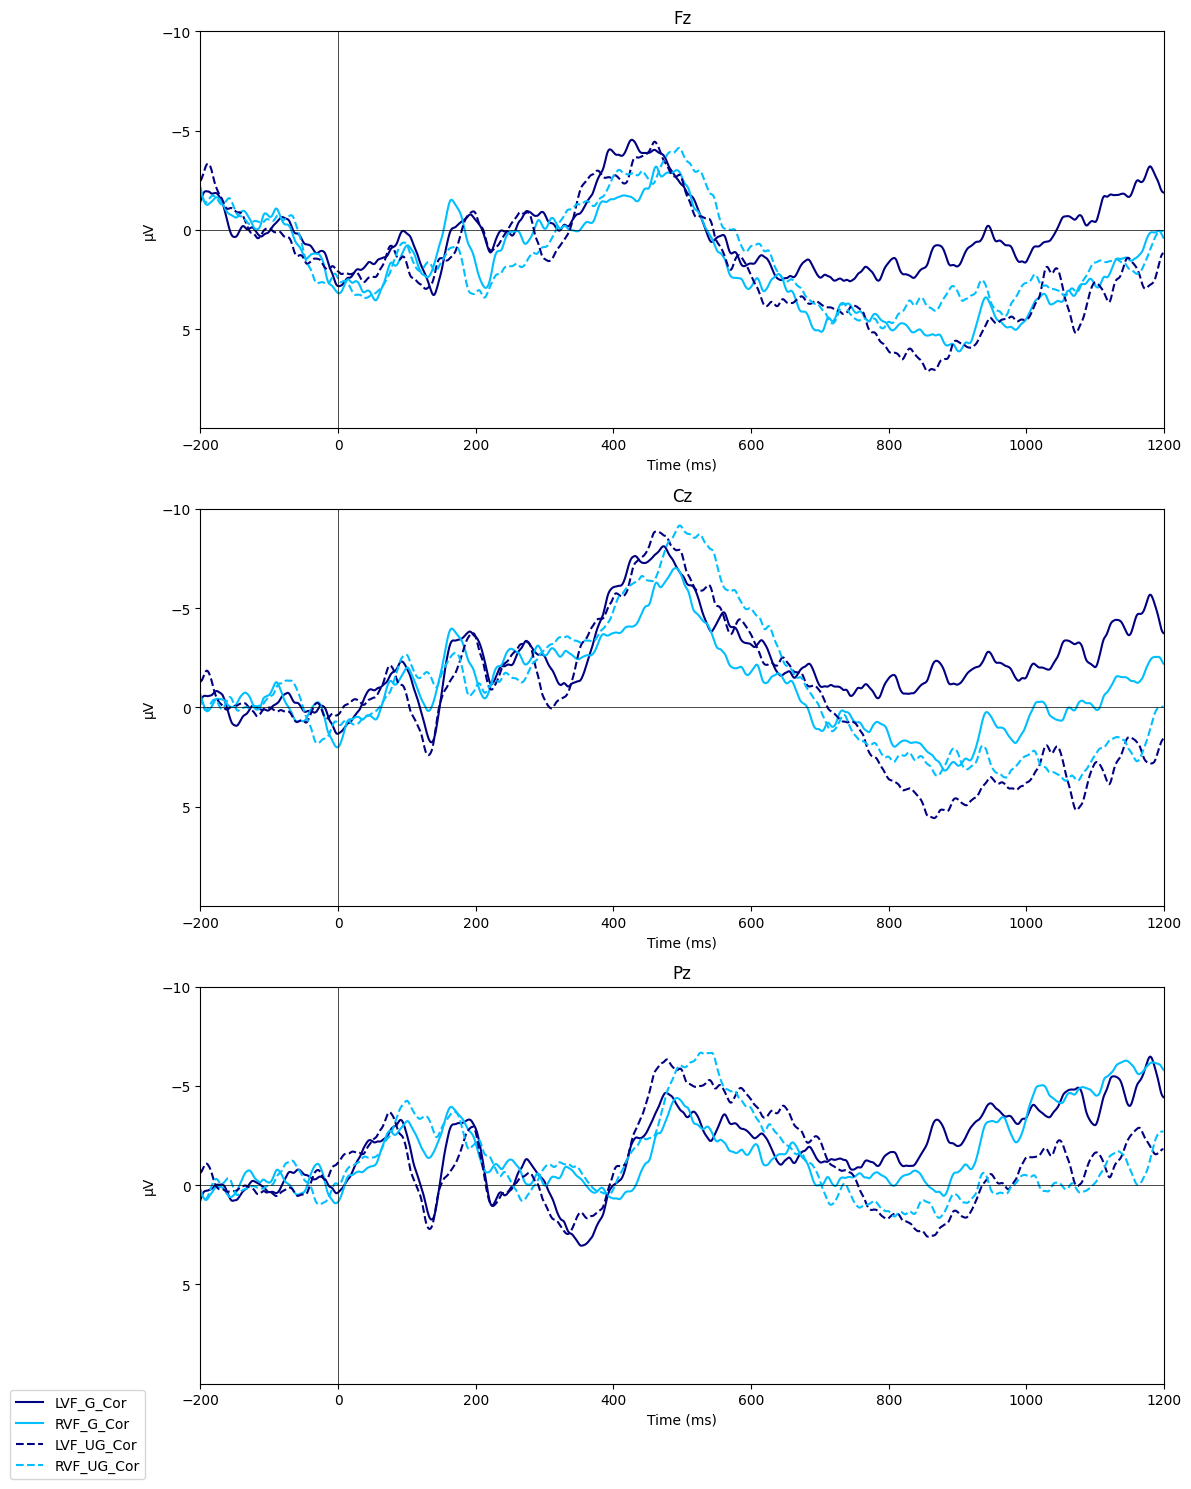

In [44]:
ch_dict = {}
for i, x in enumerate(ch_names):
    ch_dict[x] = i
    
ch_to_plot = ['Fz', 'Cz', 'Pz']
bins_to_plot = ['LVF_G_Cor', 'RVF_G_Cor', 'LVF_UG_Cor', 'RVF_UG_Cor']

t = [i for i in range(-200, 1200)]
linestyles = ['solid', 'solid', 'dashed', 'dashed']
colors = ['navy', 'deepskyblue', 'navy', 'deepskyblue']

figure, axes = plt.subplots(3,1, figsize=(12, 15), sharey=True)
for ax, ch in zip(axes.copy().flatten(), ch_to_plot):
    for i, x in enumerate(bins_to_plot):
        ax.plot(t, data[bins[x]][ch_dict[ch]],
                linestyle=linestyles[i], color=colors[i], label=x)
    ax.axvline(x=0, color='black', linewidth=0.5)
    ax.axhline(y=0, color='black', linewidth=0.5)
    ax.set_title(ch)
    ax.set_xlabel('Time (ms)')
    ax.set_xlim(-200, 1200)
    ax.set_xticks(list(range(-200,1201,200)))  # time ticks
    ax.set_ylabel('µV')
    ax.set_ylim(-10, 10)
    ax.set_yticks(list(range(-10,10,5)))  # y ticks
    ax.invert_yaxis()
    ax.yaxis.set_tick_params(labelbottom=True)
    hdl, lbl = ax.get_legend_handles_labels()
ax.legend(hdl, lbl, bbox_to_anchor=[-0.05, 0.00001]) 
figure.tight_layout()
#figure.savefig('S1_plots.png')
plt.show()

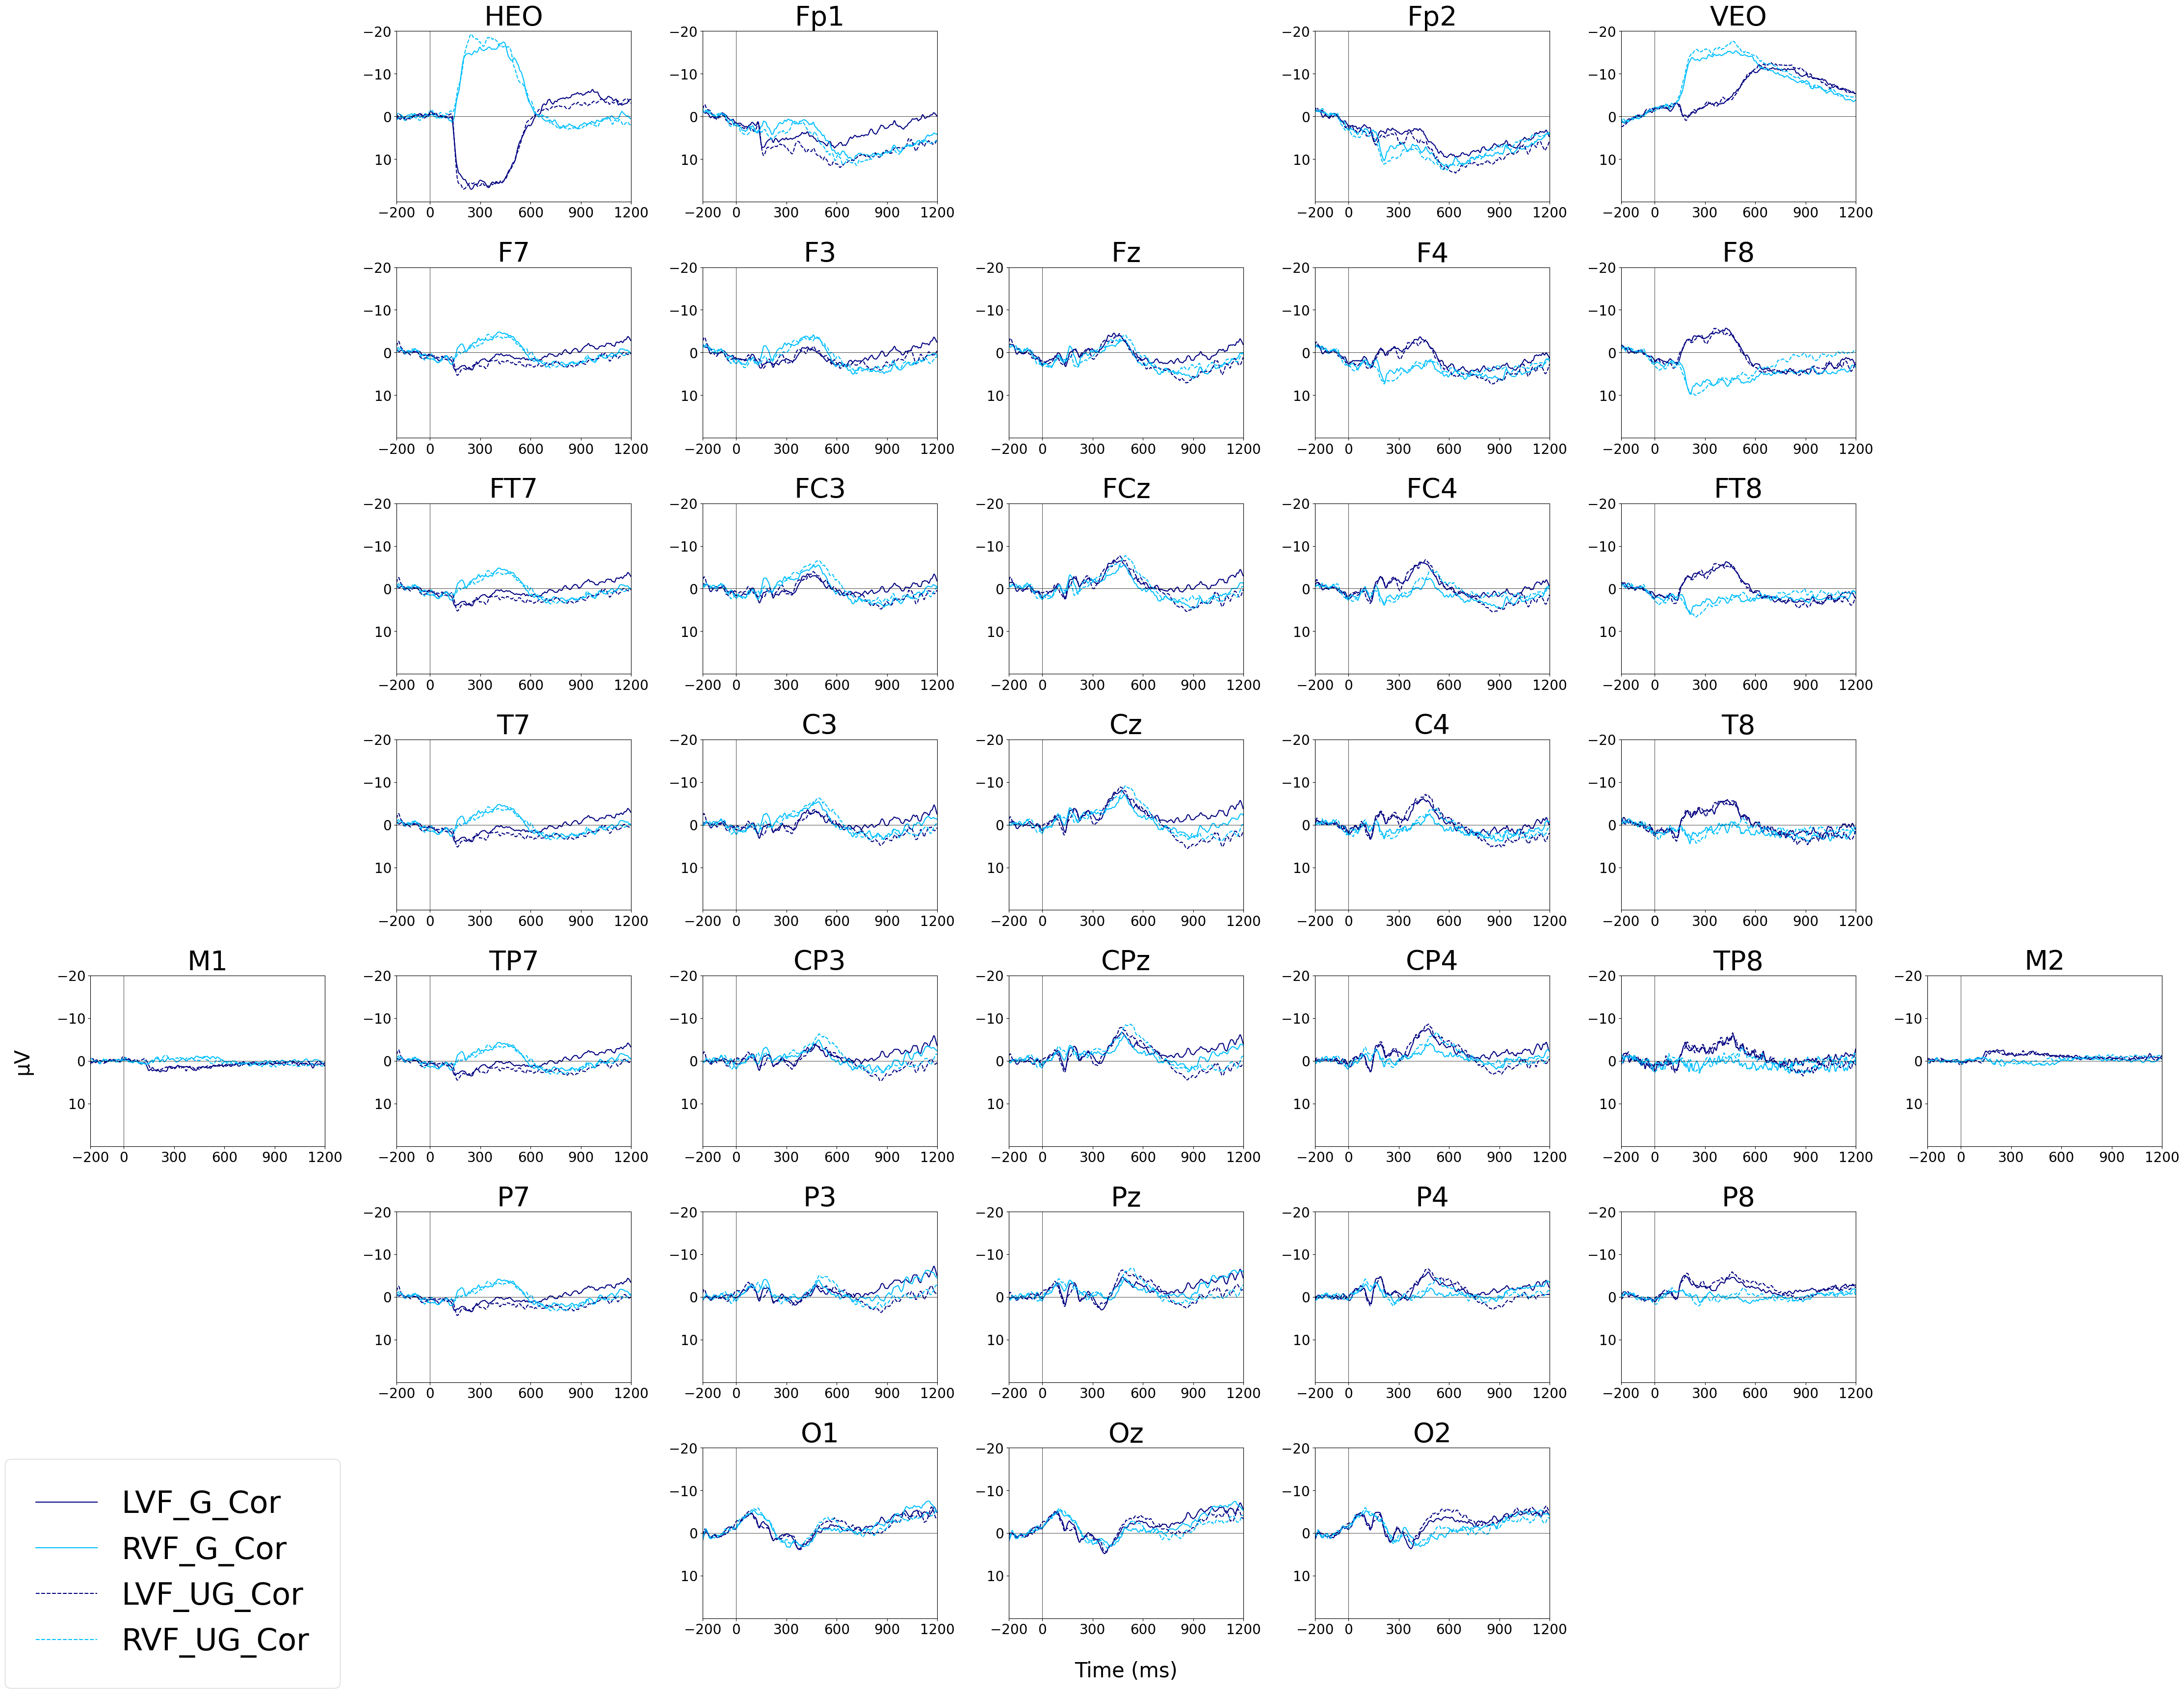

In [45]:
savefig, filepath = True, 'S2\\S2_no-ad_filt.png'

chs_to_plot = evokeds[0].ch_names
pos_dict = {'HEO':1,'Fp1':2,'Fp2':4,'VEO':5,
            'F7':8,'F3':9,'Fz':10,'F4':11,'F8':12,
            'FT7':15,'FC3':16,'FCz':17,'FC4':18,'FT8':19,
            'T7':22,'C3':23,'Cz':24,'C4':25,'T8':26,
            'M1':28,'TP7':29,'CP3':30,'CPz':31,'CP4':32,'TP8':33,'M2':34,
            'P7':36,'P3':37,'Pz':38,'P4':39,'P8':40,
            'O1':44,'Oz':45,'O2':46}
keys, vals = list(pos_dict.keys()), list(pos_dict.values())

nrows, ncols = 7, 7
figsize = (45,35)
figure, axes = plt.subplots(nrows, ncols, figsize=figsize, sharey=True)
for (m,n), ax in np.ndenumerate(axes):
    if m*ncols+n == 45: ax.set_xlabel('Time (ms)', fontsize=30, labelpad=35.0)
    if m*ncols+n == 28: ax.set_ylabel('µV', fontsize=30, labelpad=35.0)
    try:
        if keys[vals.index(m*ncols+n)] not in chs_to_plot: ax.remove()
    except ValueError:
        ax.remove()
            
for ch in chs_to_plot:
    ax = plt.subplot(nrows, ncols, pos_dict[ch]+1)
    for i, x in enumerate(bins_to_plot):
        ax.plot(t, data[bins[x]][ch_dict[ch]], linestyle=linestyles[i], color=colors[i], label=x)
    ax.axvline(x=0, color='black', linewidth=0.5)
    ax.axhline(y=0, color='black', linewidth=0.5)
    ax.set_title(ch, fontsize=40)
    ax.set_xlim(-200,1200)  # time range to plot
    ax.set_xticks([-200,0,300,600,900,1200])  # time ticks
    ax.set_ylim(-20, 20)  # y scale
    ax.set_yticks(list(range(-20,20,10)))  # y ticks
    ax.invert_yaxis()  # negative up
    ax.yaxis.set_tick_params(labelbottom=True, labelsize=20)
    ax.xaxis.set_tick_params(labelbottom=True, labelsize=20)
    hdl, lbl = ax.get_legend_handles_labels()
figure.legend(hdl, lbl, loc='lower left', bbox_to_anchor=[-0.001, -0.001], fontsize=45, borderpad=1)
figure.tight_layout(pad=3)
if savefig == True: plt.savefig(filepath)
plt.show()

### Difference waves: (Ungrammatical Correct) - (Grammatical Correct)

In [46]:
diff_ug_g = mne.combine_evoked([evokeds[bins['UG_Cor']], evokeds[bins['G_Cor']]], weights=[1,-1])
diff_data = diff_ug_g.get_data()

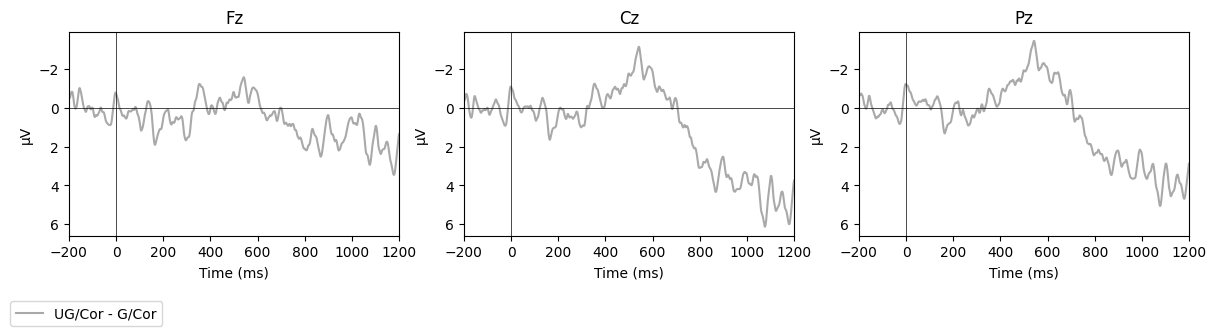

In [47]:
ch_to_plot = ['Fz', 'Cz', 'Pz']

figure, axes = plt.subplots(1,3, figsize=(12, 3), sharey=True)
for ax, ch in zip(axes.copy().flatten(), ch_to_plot):
    ax.plot(t, diff_data[ch_dict[ch]],
                linestyle='solid', color='darkgray', label='UG/Cor - G/Cor')
    ax.axvline(x=0, color='black', linewidth=0.5)
    ax.axhline(y=0, color='black', linewidth=0.5)
    ax.set_title(ch)
    ax.set_xlabel('Time (ms)')
    ax.set_xlim(-200, 1200)
    ax.set_ylabel('µV')
    ax.invert_yaxis()
    ax.yaxis.set_tick_params(labelbottom=True)
    hdl, lbl = ax.get_legend_handles_labels()
figure.legend(hdl, lbl, loc='upper left', bbox_to_anchor=[-0.001, 0.001])
figure.tight_layout()
plt.show()

### Difference waves: (Contralateral) - (Ipsilateral)

In [56]:
to_compare = ['RVF_UG_Cor', 'LVF_UG_Cor']
contra_ipsi_evokeds = [mne.channels.combine_channels(evokeds[bins[to_compare[i]]], 
                                                     groups={'FT7-FT8': [ch_dict['FT7'], ch_dict['FT8']],
                                                             'FT8-FT7': [ch_dict['FT8'], ch_dict['FT7']]},
                                           method=lambda data: data[0]-data[1]) for i in range(len(to_compare))]
contra_ipsi_evokeds[0].ch_names

['FT7-FT8', 'FT8-FT7']

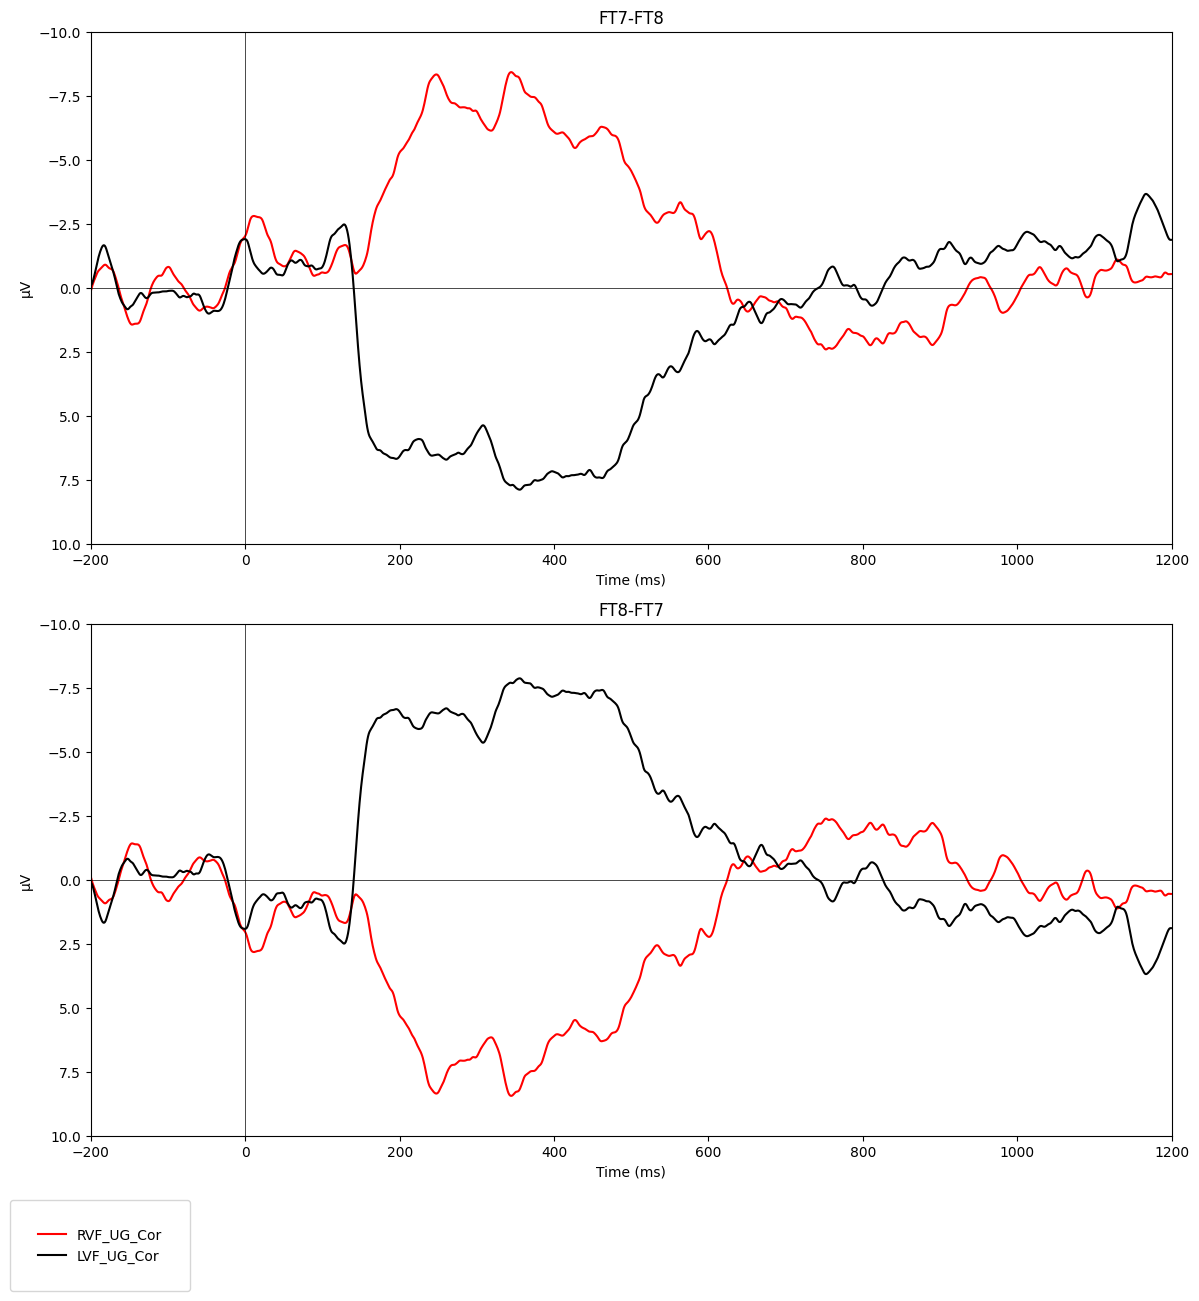

In [58]:
n_times = evokeds[0].get_data().shape[1]
contra_ipsi_data = np.array([contra_ipsi_evokeds[i].get_data() for i in range(len(contra_ipsi_evokeds))],
                            dtype=object).reshape(2, 2, n_times)

ch_to_plot = ['FT7-FT8', 'FT8-FT7']
bins_to_plot = ['RVF_UG_Cor', 'LVF_UG_Cor']
colors = ['red', 'black']

figure, axes = plt.subplots(2,1, figsize=(12, 12))
for ax, ch in zip(axes.copy().flatten(), ch_to_plot):
    for i, x in enumerate(bins_to_plot):
        ax.plot(t, contra_ipsi_data[i][ch_to_plot.index(ch)],
                linestyle='solid', color=colors[i], label=x)
    ax.axvline(x=0, color='black', linewidth=0.5)
    ax.axhline(y=0, color='black', linewidth=0.5)
    ax.set_title(ch)
    ax.set_xlabel('Time (ms)')
    ax.set_ylim(-10, 10)
    ax.set_xlim(-200, 1200)
    ax.set_ylabel('µV')
    ax.invert_yaxis() 
    ax.yaxis.set_tick_params(labelbottom=True)
    hdl, lbl = ax.get_legend_handles_labels()
figure.legend(hdl, lbl, loc='upper left', borderpad=2, bbox_to_anchor=[-0.001, 0.001])
figure.tight_layout()
plt.show()

### Topo maps: (Ungrammatical Correct) - (Grammatical Correct)

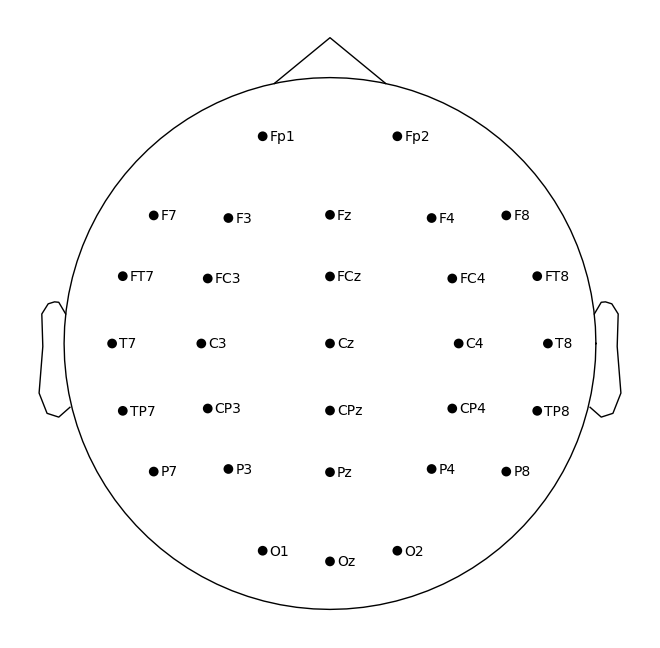

In [79]:
diff_data = 1e-06*diff_ug_g.get_data()[:,200:] # Cutting off the 200-ms baseline; scale by 1e-06
evoked_topo = mne.EvokedArray(data=diff_data, info=info)

montage = evoked_topo.get_montage()
montage.plot();

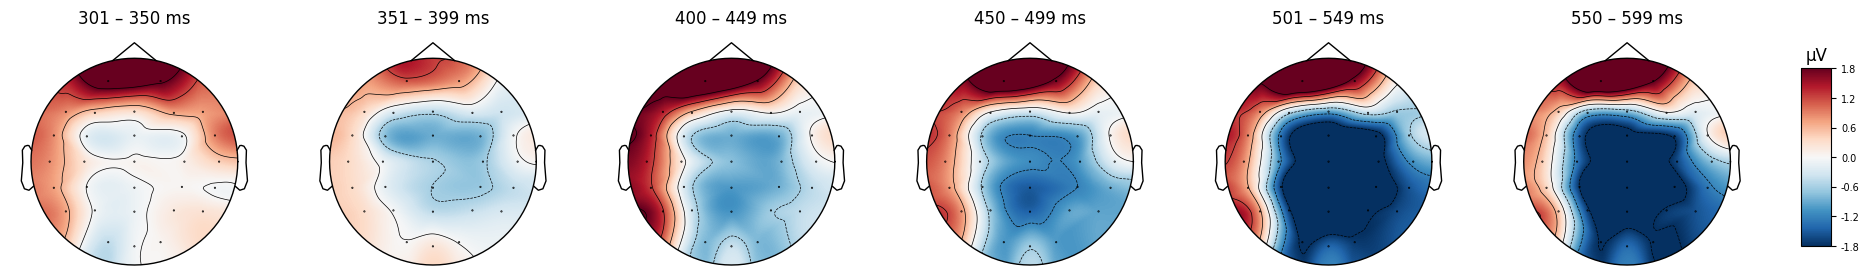

In [81]:
# N400 (300ms - 500ms)
evoked_topo.plot_topomap(times=np.array([325+i*50 for i in range(0,6)])/1000, average=[0.05]*6,
                         vlim=(-1.8,1.8), time_unit='ms', size=2, res=128, mask=None, contours=5);

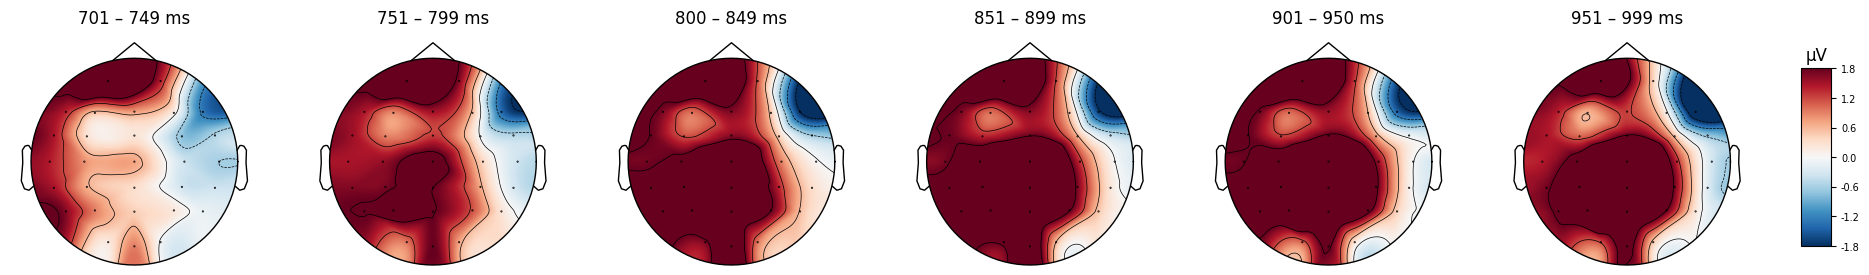

In [82]:
# P600 (700ms - 1000ms)
evoked_topo.plot_topomap(times=np.array([725+i*50 for i in range(0,6)])/1000, average=[0.05]*6,
                          time_unit='ms', vlim=(-1.8, 1.8), size=2, res=128, mask=None, contours=5);